### Problem Statement

Build a model that predicts the rating of a movie based on
features like genre, director, and actors,

### (Random Forest Regression)
We use a "Random Forest Regression" Algorithm to predict Rating.


##### Importing Libraries

In [1]:
# Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Model
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

##### Importing Dataset

In [2]:
df_movie=pd.read_csv("imdb.csv",encoding='latin1')
df_movie.shape

(15509, 10)

In [3]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##### Cleaning the data and removing outliers.

In [4]:
df_movie['Duration'] = df_movie['Duration'].str.replace('min', '').apply(pd.to_numeric)
df_movie['Votes']=df_movie['Votes'].replace("$5.16M",516)
df_movie["Votes"] = pd.to_numeric(df_movie['Votes'].str.replace(',', ''))

In [5]:
df_movie.describe()

,Duration,Rating,Votes
count,7240.000000,7919.000000,7919.000000
mean,128.126519,5.841621,1938.520394
std,28.912724,1.381777,11602.415952
min,2.000000,1.100000,5.000000
25%,110.000000,4.900000,16.000000
50%,131.000000,6.000000,55.000000
75%,147.000000,6.800000,404.000000
max,321.000000,10.000000,591417.000000


##### Checking for Null values.

In [6]:
df_movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

##### Deleting Null values row as per "Year" and "Genre" column. 

In [7]:
df_movie.dropna(subset=['Year'], inplace=True)
df_movie.dropna(subset=['Genre'], inplace=True)

##### Data Filling in "Rating", "Duration", "Votes" columns

In [8]:
df_movie['Rating'].fillna(df_movie['Rating'].mode().max(), inplace=True)
df_movie['Duration'].fillna(df_movie['Duration'].mean(), inplace=True)
df_movie['Votes'].fillna(df_movie['Votes'].mean(), inplace=True)
df_movie.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

##### Checking for Null values.

In [9]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
def Talents(column):
    global df_movie
    df_movie[column].value_counts().sort_values(ascending=False)[:5].plot(kind="bar",figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

In [11]:
def Histo(column):
    global df_movie
    plt.figure(figsize=(20,6))
    plt.hist(df_movie[column],edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

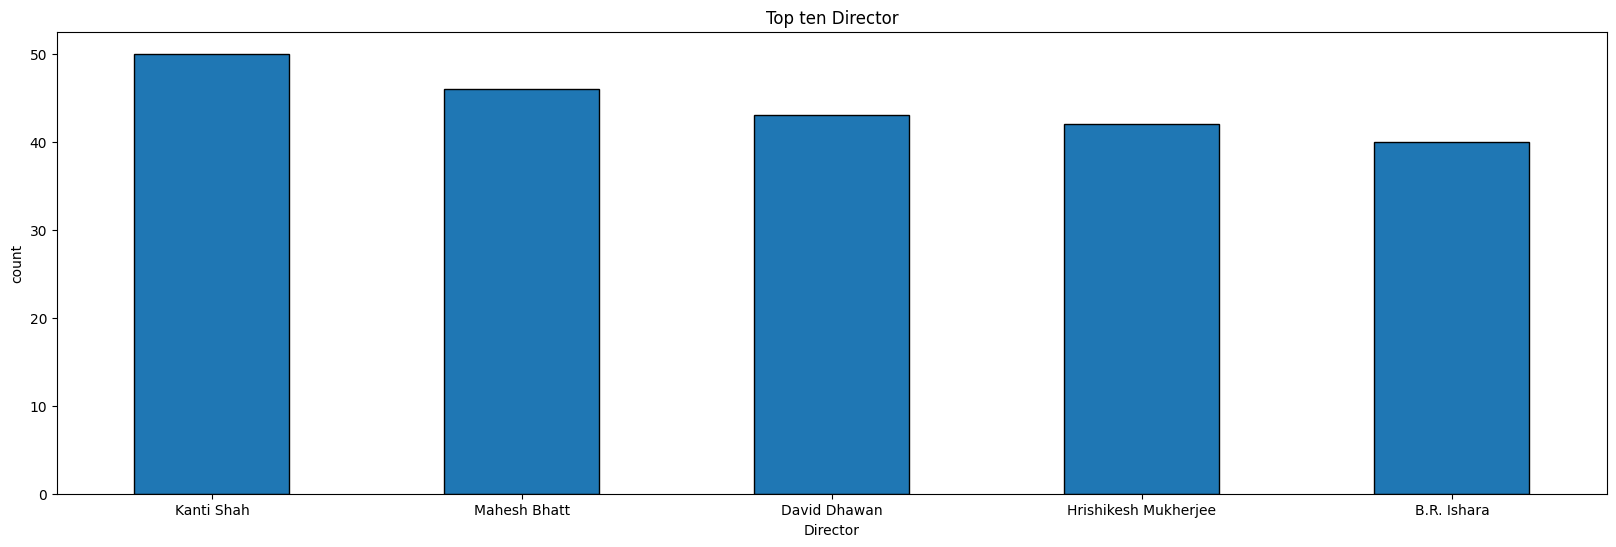

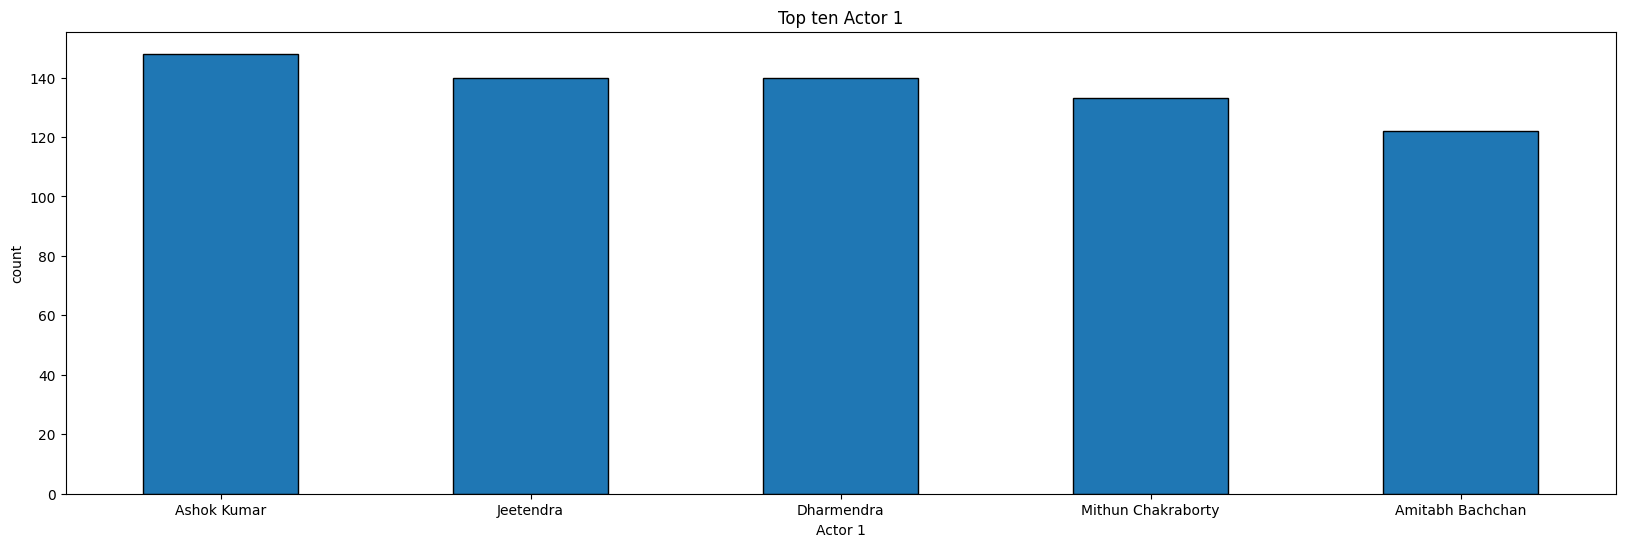

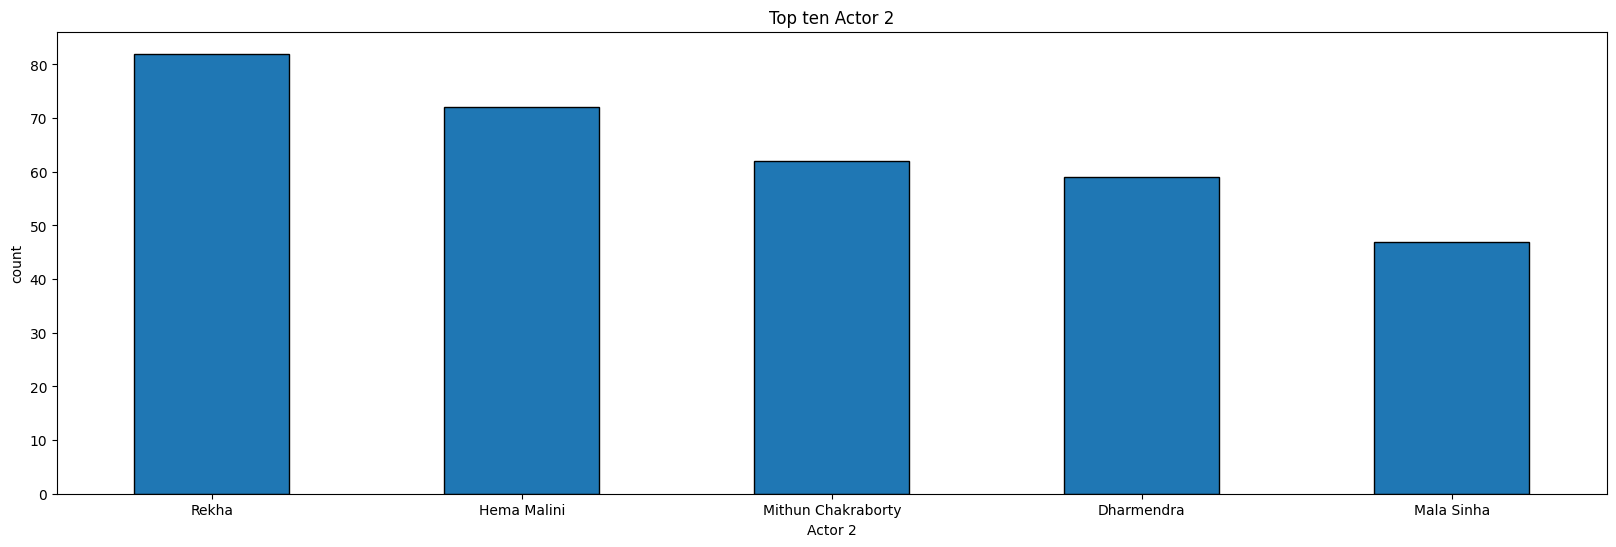

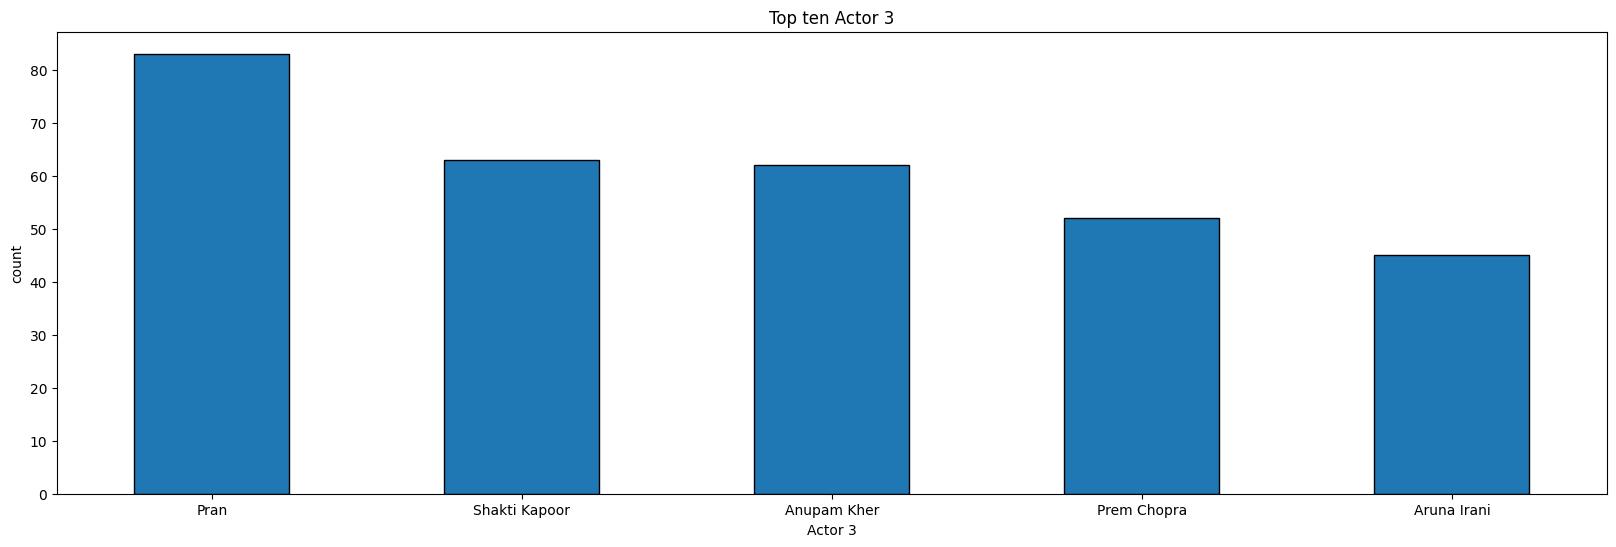

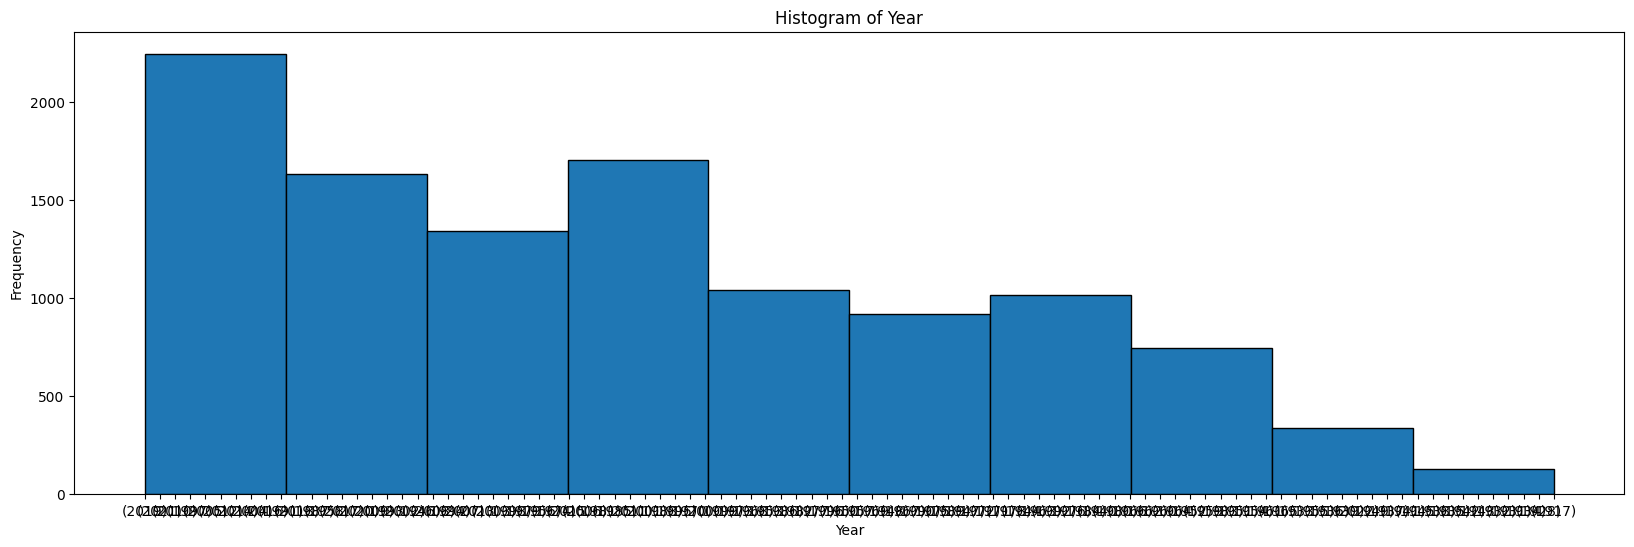

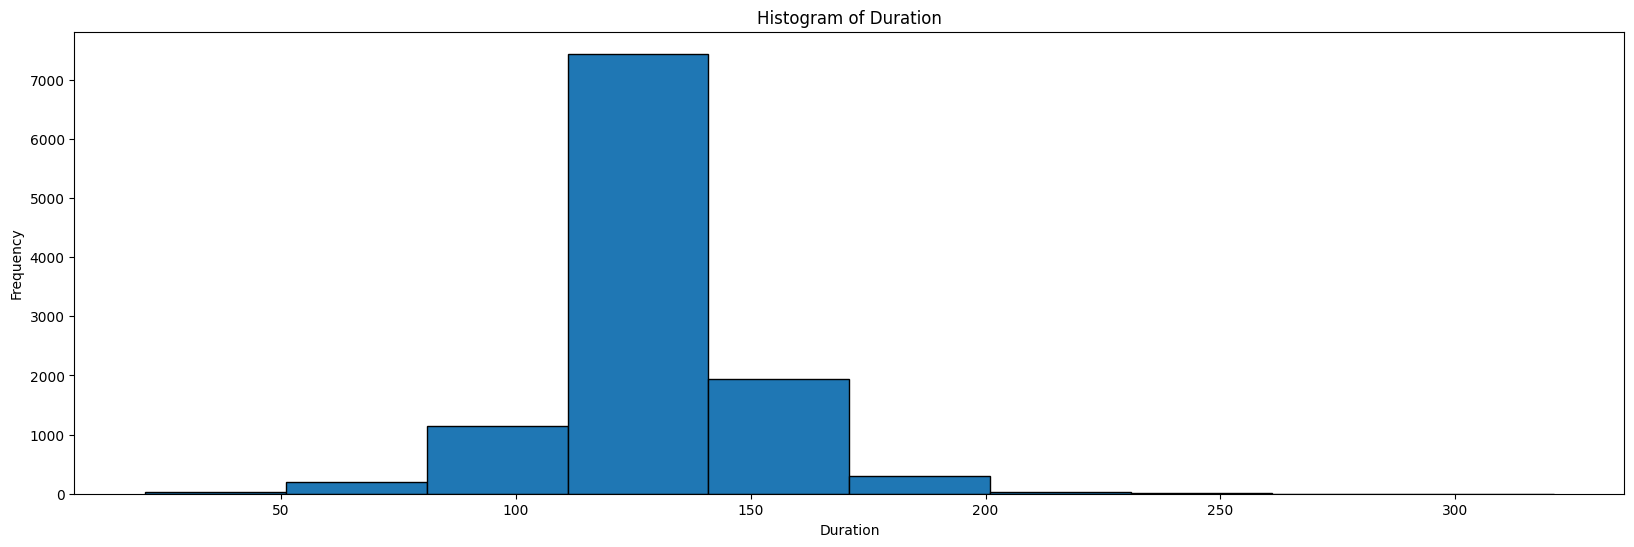

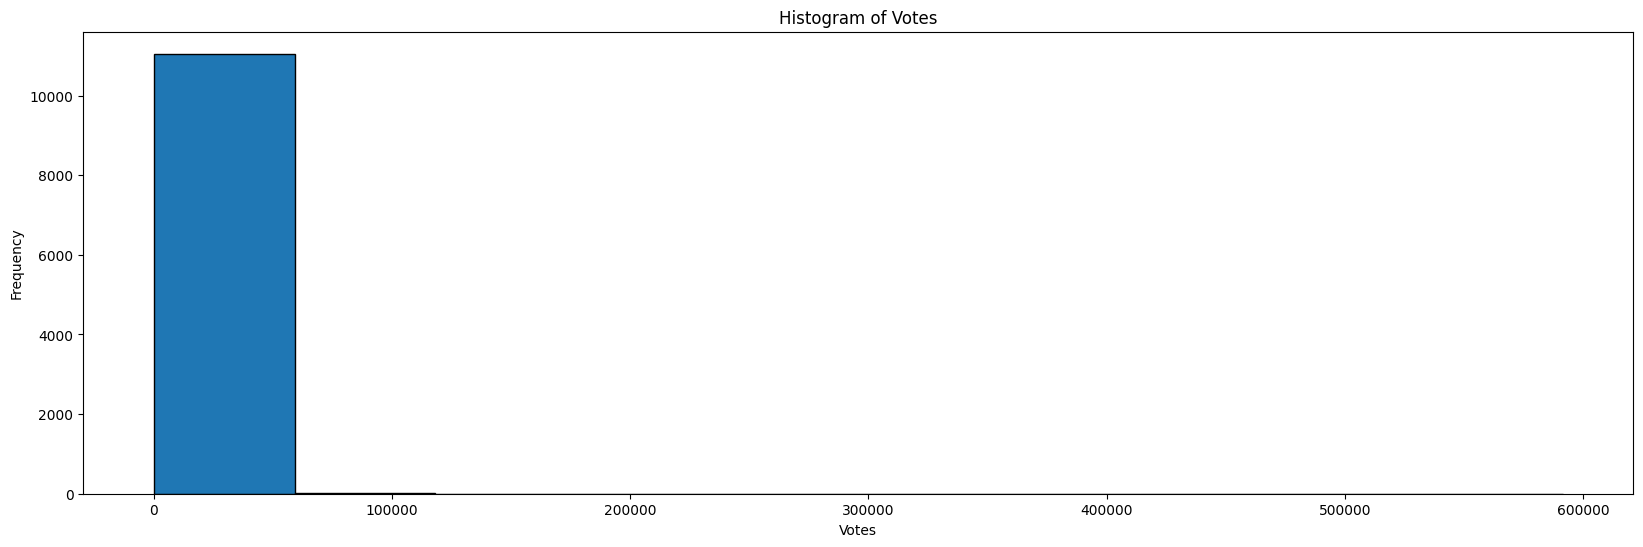

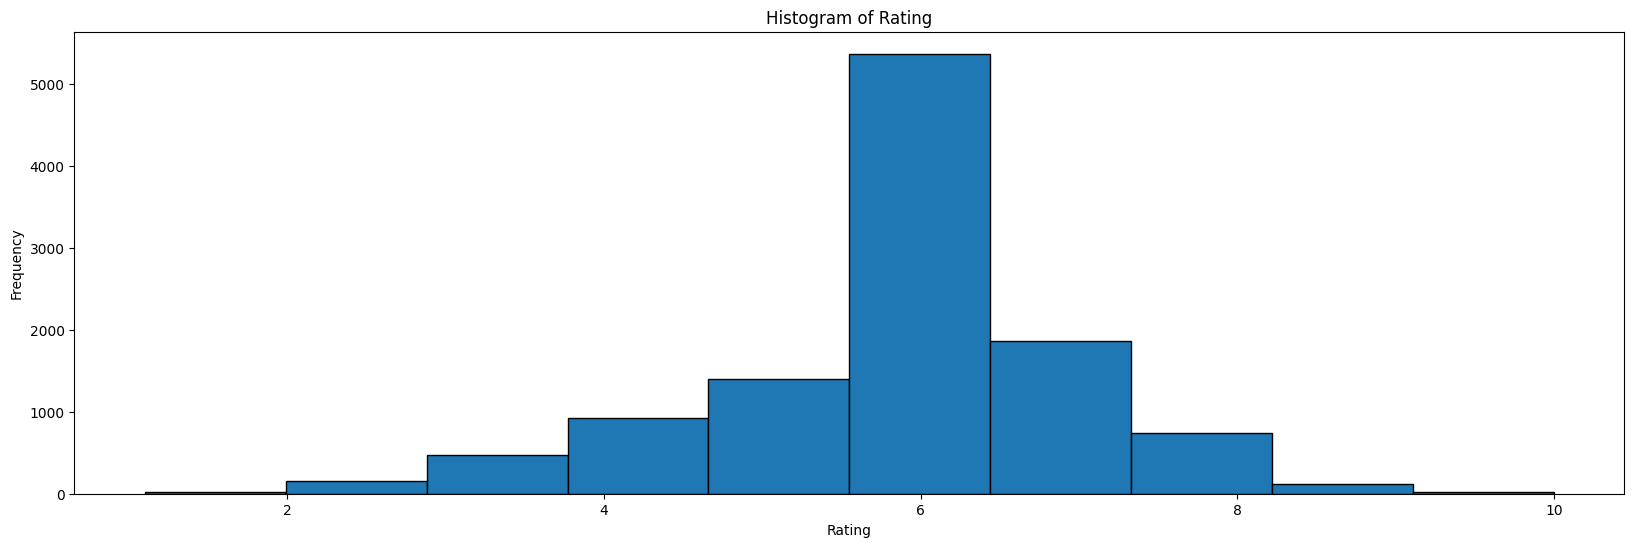

In [12]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

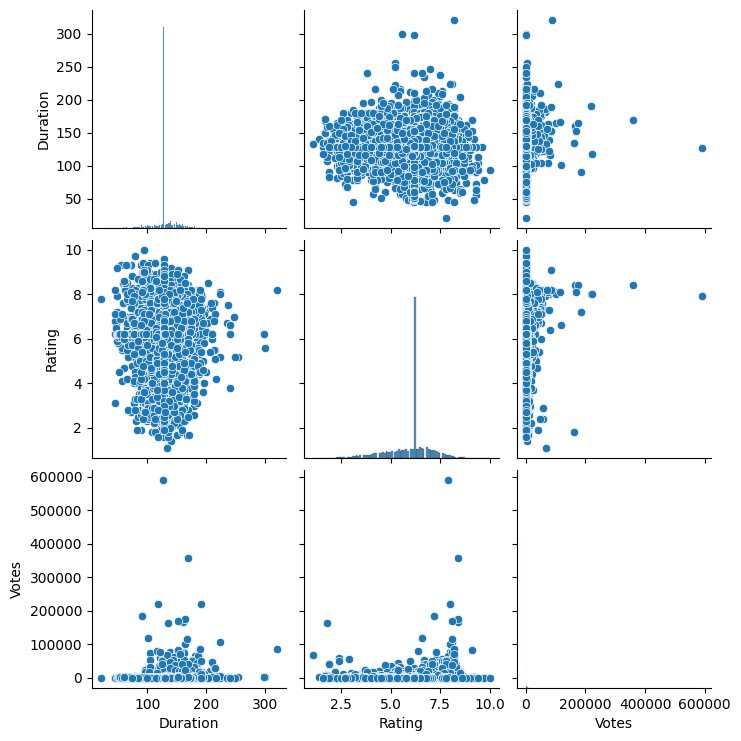

In [13]:
sns.pairplot(df_movie)
numeric_columns=df_movie.select_dtypes(include=['float64','int64']).columns
correlation_matrix=df_movie[numeric_columns].corr(method='spearman')

In [14]:
df_movie['Year'] = df_movie['Year'].astype(str).str.extract(r'(\d+)').astype(float)
non_numeric_columns=df_movie.select_dtypes(exclude=['float64','int64']).columns
print(non_numeric_columns)

Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


##### Encoding

In [15]:
actor1_encoding_map=df_movie.groupby(['Actor 1']).agg({'Rating':'mean'}).to_dict()['Rating']
actor2_encoding_map=df_movie.groupby(['Actor 2']).agg({'Rating':'mean'}).to_dict()['Rating']
actor3_encoding_map=df_movie.groupby(['Actor 3']).agg({'Rating':'mean'}).to_dict()['Rating']
director_encoding_map=df_movie.groupby(['Director']).agg({'Rating':'mean'}).to_dict()['Rating']
genre_encoding_map=df_movie.groupby(['Genre']).agg({'Rating':'mean'}).to_dict()['Rating']

df_movie['actor1_encoded']=round(df_movie['Actor 1'].map(actor1_encoding_map),1)
df_movie['actor2_encoded']=round(df_movie['Actor 2'].map(actor2_encoding_map),1)
df_movie['actor3_encoded']=round(df_movie['Actor 3'].map(actor3_encoding_map),1)
df_movie['director_encoded']=round(df_movie['Director'].map(director_encoding_map),1)
df_movie['genre_encoded']=round(df_movie['Genre'].map(genre_encoding_map),1)

##### Create RandomForestRegression Model

In [16]:
df_movie.drop(['Actor 1','Actor 2','Actor 3','Director','Genre'],axis=1, inplace=True)

X=df_movie[['Year','Duration','Votes','actor1_encoded','actor2_encoded','actor3_encoded','director_encoded','genre_encoded']]
y=df_movie['Rating']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

##### Evaluate Random Forest Regressor

In [17]:
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 0.2637874044183949
Mean Absolute Error: 0.30012578899910347
R2 Score: 0.8003450045759882


##### Scatter plot for Random Forest Regressor prediction

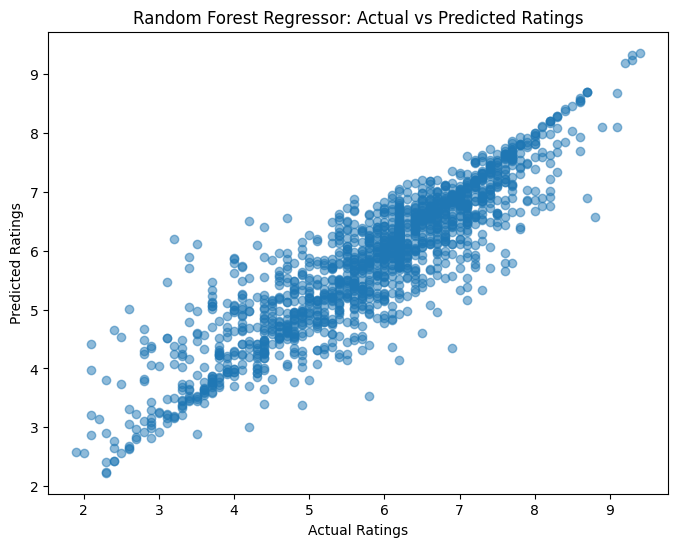

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

##### Model is ready to prediction.

In [19]:
ratinng_predict=rf.predict(X)

##### Generate a CSV file for "Movie_name" and "Rating".

In [20]:
ratings=[]
for i in ratinng_predict:
        ratings.append(int(i))

movie_names=df_movie['Name'].to_list()
new_data=pd.DataFrame({"Movie Name":movie_names,"Rating":ratings})
new_data.to_csv("Movie_Ratings.csv")

In [21]:
new_data

,Movie Name,Rating
0,#Gadhvi (He thought he was Gandhi),6
1,#Homecoming,6
2,#Yaaram,4
3,...And Once Again,6
4,...Aur Pyaar Ho Gaya,4
...,...,...
11081,Zulm Ki Pukar,6
11082,Zulm Ki Zanjeer,5
11083,Zulm Ko Jala Doonga,4
11084,Zulmi,4
